Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 32, 32, 3)      │       584,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,128,451 (4.30 MB)

 Trainable params: 1,128,451 (4.30 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0328 - val_loss: 0.0105
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0097 - val_loss: 0.0082
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0077 - val_loss: 0.0068
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0057 - val_loss: 0.0059
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 12/30
391/391 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


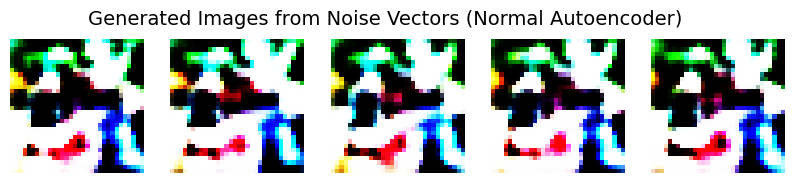

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

latent_dim = 128
input_shape = (32, 32, 3)

encoder_input = layers.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(encoder_input)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
encoder_output = layers.Dense(latent_dim)(x)
encoder = models.Model(encoder_input, encoder_output, name="encoder")

decoder_input = layers.Input(shape=(latent_dim,))
x = layers.Dense(8*8*64, activation='relu')(decoder_input)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)
decoder_output = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(x)
decoder = models.Model(decoder_input, decoder_output, name="decoder")

autoencoder_input = encoder_input
autoencoder_output = decoder(encoder_output)
autoencoder = models.Model(inputs=autoencoder_input, outputs=autoencoder_output, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_test, x_test))

noise_vectors = np.random.normal(loc=5.0, scale=1.0, size=(5, latent_dim))

generated_images = decoder.predict(noise_vectors)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(generated_images[i])
    plt.axis("off")
plt.suptitle("Generated Images from Noise Vectors (Normal Autoencoder)", fontsize=14)
plt.show()


Model: "denoising_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ denoising_decoder (Functional)  │ (None, 32, 32, 3)      │       584,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,128,451 (4.30 MB)

 Trainable params: 1,128,451 (4.30 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0335 - val_loss: 0.0119
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0109 - val_loss: 0.0094
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 10/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 11/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0065 - val_loss: 0.0067
Epoch 12/30
391/391 ━━━━━━━━━━━━━━━━━━━━

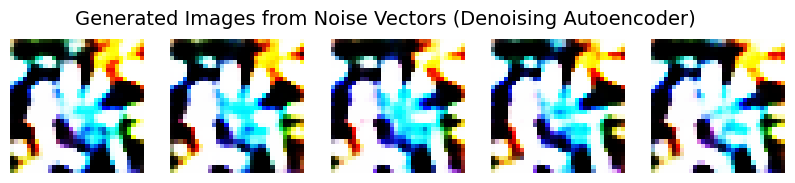

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

latent_dim = 128
input_shape = (32, 32, 3)

encoder_input = layers.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(encoder_input)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
encoder_output = layers.Dense(latent_dim)(x)
encoder = models.Model(encoder_input, encoder_output, name="denoising_encoder")

decoder_input = layers.Input(shape=(latent_dim,))
x = layers.Dense(8*8*64, activation='relu')(decoder_input)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)
decoder_output = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(x)
decoder = models.Model(decoder_input, decoder_output, name="denoising_decoder")

autoencoder_input = encoder_input
autoencoder_output = decoder(encoder_output)
denoising_autoencoder = models.Model(inputs=autoencoder_input, outputs=autoencoder_output, name="denoising_autoencoder")
denoising_autoencoder.compile(optimizer='adam', loss='mse')
denoising_autoencoder.summary()

denoising_autoencoder.fit(x_train_noisy, x_train, epochs=30, batch_size=128, validation_data=(x_test_noisy, x_test))

noise_vectors = np.random.normal(loc=5.0, scale=1.0, size=(5, latent_dim))

generated_images = decoder.predict(noise_vectors)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(generated_images[i])
    plt.axis("off")
plt.suptitle("Generated Images from Noise Vectors (Denoising Autoencoder)", fontsize=14)
plt.show()


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - kl_loss: 4.6299 - loss: 163.1092 - reconstruction_loss: 158.4793
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - kl_loss: 14.7177 - loss: 109.4721 - reconstruction_loss: 94.7544
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - kl_loss: 16.8341 - loss: 95.9513 - reconstruction_loss: 79.1172
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - kl_loss: 16.8803 - loss: 88.6019 - reconstruction_loss: 71.7216
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - kl_loss: 17.1584 - loss: 85.1141 - reconstruction_loss: 67.9556
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - kl_loss: 17.4123 - loss: 83.3125 - reconstruction_loss: 65.9002
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - kl_loss: 17.4311 - loss: 81.5911 - reconstruction_loss: 64.1600
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - kl_loss: 17.5595 - loss: 81.0681 - reconstruction_loss: 63.5086
Epoch 9/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11

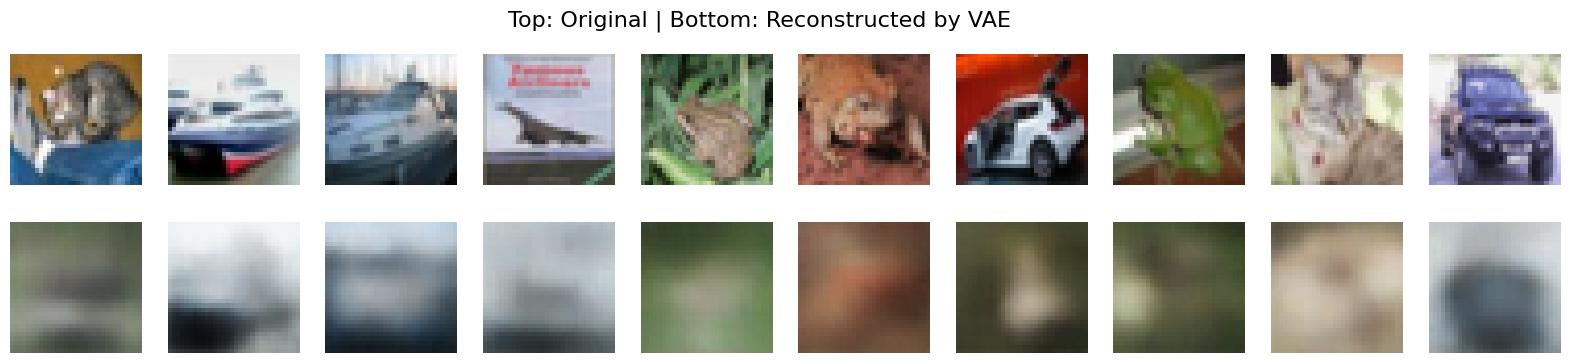

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.losses import MeanSquaredError

(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

latent_dim = 128
input_shape = (32, 32, 3)

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

encoder_inputs = layers.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(encoder_inputs)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="vae_encoder")

decoder_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 64, activation='relu')(decoder_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)
decoder_outputs = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(x)
decoder = models.Model(decoder_inputs, decoder_outputs, name="vae_decoder")

class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    def compile(self, optimizer, **kwargs):
        super(VAE, self).compile(**kwargs)
        self.optimizer = optimizer
        self.reconstruction_loss_fn = MeanSquaredError()

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            recon_loss = self.reconstruction_loss_fn(data, reconstruction)
            recon_loss *= 32 * 32 * 3
            kl_loss = -0.5 * tf.reduce_sum(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = recon_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam(), loss=None)
vae.fit(x_train, epochs=30, batch_size=128)

z_mean, z_log_var, z = encoder.predict(x_test[:10])
reconstructed_images = decoder.predict(z)

plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i])
    plt.axis("off")

    plt.subplot(2, 10, 10 + i + 1)
    plt.imshow(reconstructed_images[i])
    plt.axis("off")

plt.suptitle("Top: Original | Bottom: Reconstructed by VAE", fontsize=16)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


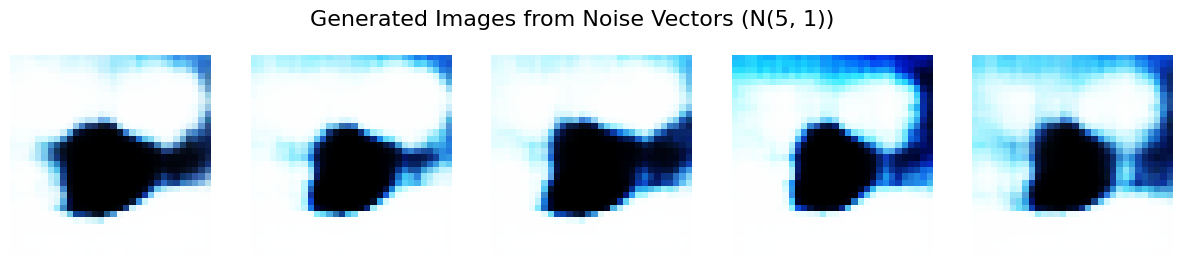

In [16]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 5
noise = np.random.normal(loc=5.0, scale=1.0, size=(num_samples, latent_dim))

generated_images = decoder.predict(noise)

plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i])
    plt.axis("off")
plt.suptitle("Generated Images from Noise Vectors (N(5, 1))", fontsize=16)
plt.show()
